### 시계열 데이터 분석

- 연도, 월, 일자 같은 시간성을 띠는 데이터를 학습하여 미래의 수치를 예측하는 분석

####  시간그래프
-  관측값을 관측 시간에 따라 인접한 관측값을 직선으로 연결하여 그리는 것

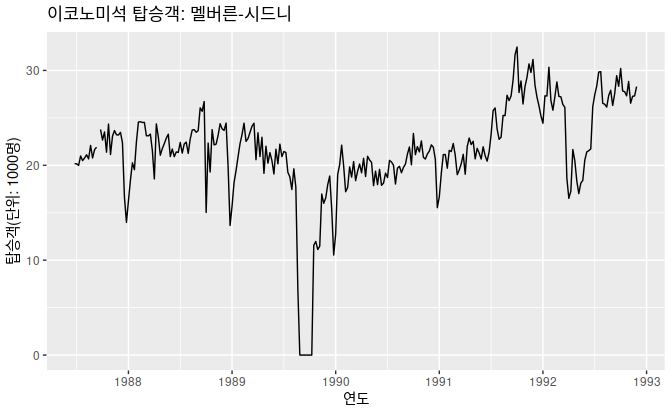

- 1989년은 파업으로 인해 수공객이 없었던 기간
- 1992년은 수송객이 급력하게 감소하는 기간이 보임 - 이코노미 좌석이 비지니스 좌석으로 교체 됨
- 1992년 후반에 수송객이 크게 증가
- 휴가철 효과 때문에 연말 연초에 일시적으로 크게 하락하는 지점이 보임
- 장기적으로 볼때 변동 지점이 보임
- 관측값이 없는 구간도 일부 보임

## 시계열 데이터 처리

- 시계열 데이터 분석의 목적

1. 미래 시계열 값의 예측 (forecasting)
2. 시계열 패턴을 분류 (정상, 고장, 위험 등)

- 시계열 데이터 유형
1. 각 샘플이 날짜나 시각 (연월일 시분초) 정보를 포함하고 있는 경우
2. 시각 정보 없이 샘플 값만 나열된 경우 (대부분 샘플링 간격이 일정하다)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

datetime
- 연월일 시분초 정보를 다루는 특수 데이터 구조체

In [2]:
# 현재 시각 얻기
from datetime import datetime
t1 = datetime.now()
t1

datetime.datetime(2021, 10, 15, 14, 24, 46, 197028)

In [3]:
# 연월일 시분초 정보 얻기
t1.year, t1.month, t1.day, t1.hour, t1.minute, t1.second

(2021, 10, 15, 14, 24, 46)

In [4]:
df = pd.read_csv('./new_weather.csv', index_col = 0)
df

연월일    기온
0     2006-01-01   3.6
1     2006-01-02   4.0
2     2006-01-03   3.7
3     2006-01-04   4.0
4     2006-01-05   3.6
...          ...   ...
4013  2016-12-27  11.1
4014  2016-12-28   6.0
4015  2016-12-29   4.3
4016  2016-12-30   6.0
4017  2016-12-31   6.3

[4018 rows x 2 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연월일     4018 non-null   object 
 1   기온      4018 non-null   float64
dtypes: float64(1), object(1)
memory usage: 94.2+ KB


In [6]:
# 시간 데이터로 변환
df['연월일']=pd.to_datetime(df['연월일'])
df

연월일    기온
0    2006-01-01   3.6
1    2006-01-02   4.0
2    2006-01-03   3.7
3    2006-01-04   4.0
4    2006-01-05   3.6
...         ...   ...
4013 2016-12-27  11.1
4014 2016-12-28   6.0
4015 2016-12-29   4.3
4016 2016-12-30   6.0
4017 2016-12-31   6.3

[4018 rows x 2 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연월일     4018 non-null   datetime64[ns]
 1   기온      4018 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 94.2 KB


In [8]:
df.set_index('연월일', inplace=True)

In [9]:
df.head()

기온
연월일            
2006-01-01  3.6
2006-01-02  4.0
2006-01-03  3.7
2006-01-04  4.0
2006-01-05  3.6

In [10]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

<AxesSubplot:xlabel='연월일'>

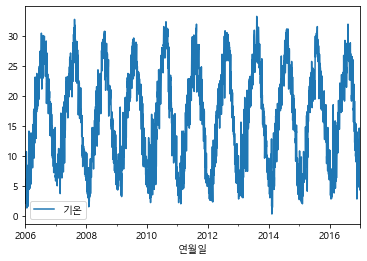

In [11]:
df.plot()

In [12]:
y = df["기온"].values #기온의 변화만 추출해서 사용
len(y)

4018

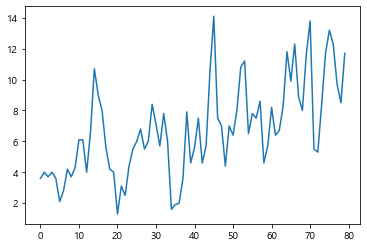

In [13]:
## 시계열은 오늘의 날씨 데이터를 이용해서 내일의 날씨를 예측
## 타겟값이 하루 하루 바뀌는 데이터
## 81번째 데이터를 예측
plt.plot(y[:80])

In [14]:
# 전체 시계열 데이터중 앞부분 75%를 훈련 데이터로, 나머지를 검증 데이터로 나누는 예
ratio = 0.75
cut = np.int(len(y)*ratio)

train = y[:cut]
test = y[cut:]
len(y), len(train), len(test)
# 시계열 데이터는 학습과 테스트 데이터 분리시 랜덤하게 섞으면 안됨

(4018, 3013, 1005)

### 시계열 데이터를 테이블 구조로 만들기
- 비정형인(크기가 일정치 않은) 시계열 데이터를 정형 데이터인 테이블 구조로 만드는 방법
- 5개의 시계열 데이터를 보고 6번째 값을 예측하는 경우

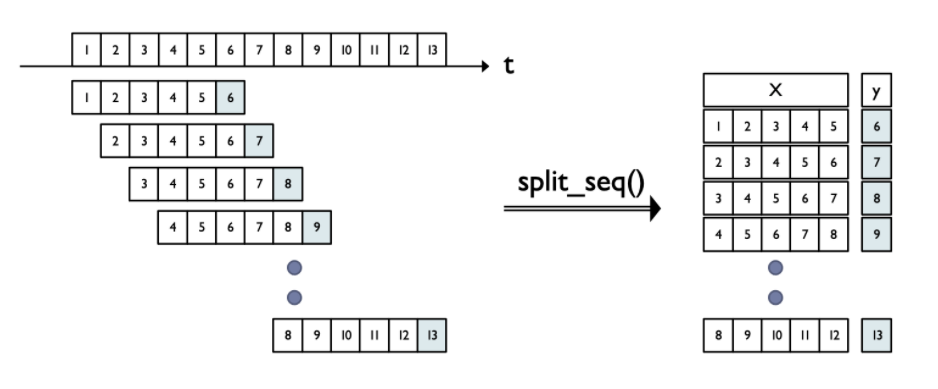

split_seq()
- 시계열 데이터를 테이블 구조로 표현하는 작업을 수행
- data는 입력 시계열 데이터 (위 그림에서 len(data)=13임)
- n_steps는 한 샘플의 크기 (위 그림에서 5)

In [16]:
def split_seq(data, n_steps):
    x, y = [], []
    for i in range(len(data)):
        if i > len(data) - (n_steps + 1) : break
        x.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(x), np.array(y)

In [17]:
# 예: 과거 5개의 샘플을 보고 다음 값을 예측하기 위한 훈련데이터 X, y 생성
data = [1,2,3,4,5,6,7,8,9,10,11,12,13]
x_train, y_train = split_seq(data, 5)

pd.DataFrame(list(zip(x_train, y_train)), columns=['X','y'])

X   y
0     [1, 2, 3, 4, 5]   6
1     [2, 3, 4, 5, 6]   7
2     [3, 4, 5, 6, 7]   8
3     [4, 5, 6, 7, 8]   9
4     [5, 6, 7, 8, 9]  10
5    [6, 7, 8, 9, 10]  11
6   [7, 8, 9, 10, 11]  12
7  [8, 9, 10, 11, 12]  13

In [18]:
# 날씨 데이터 예측

# 선형 회귀 모델 함수
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

### 날씨(기온) 데이터의 특성 - 7일 이내의 예측은 과거 10일 또는 20일 정도의 데이터를 이용하면 쉽게 예측이 됨

In [20]:
n_steps = 10

# 훈련 데이터
x_train, y_train = split_seq(train, n_steps)

# 검증 데이터
x_test, y_test = split_seq(test, n_steps)

In [21]:
x_train

array([[ 3.6,  4. ,  3.7, ...,  4.2,  3.7,  4.3],
       [ 4. ,  3.7,  4. , ...,  3.7,  4.3,  6.1],
       [ 3.7,  4. ,  3.6, ...,  4.3,  6.1,  6.1],
       ...,
       [ 8.1, 10.1,  9.3, ..., 12.6, 14.8, 17.7],
       [10.1,  9.3, 11.6, ..., 14.8, 17.7, 16.5],
       [ 9.3, 11.6, 13.6, ..., 17.7, 16.5, 15.7]])

In [22]:
# 훈련 수행
lr.fit(x_train, y_train) 

LinearRegression()

In [23]:
# 성능 평가: 회귀에서는 디폴트로 R-Squared 점수를 알려준다 
lr.score(x_test, y_test).round(4) 

0.936

In [24]:
# 실제값(y_test)과 예측값(y_pred) 비교
y_pred = lr.predict(x_test)

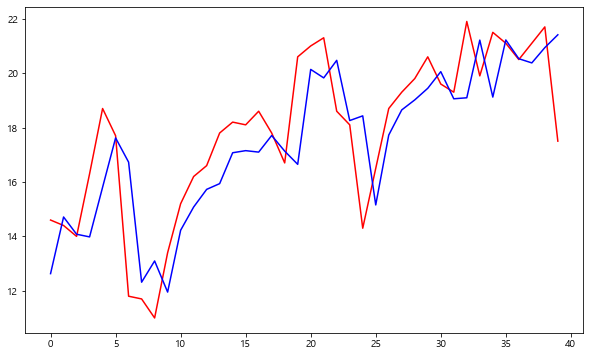

In [25]:
# 실제값 붉은색, 예측값 파란색
plt.figure(figsize=(10, 6))
plt.plot(y_test[:40], c='r')
plt.plot(y_pred[:40], c='b')
plt.show()

In [26]:
a = df[['기온']]
b = a[300:310]
b

기온
연월일             
2006-10-28  19.0
2006-10-29  19.0
2006-10-30  18.7
2006-10-31  18.7
2006-11-01  18.6
2006-11-02  16.6
2006-11-03  17.4
2006-11-04  17.4
2006-11-05  17.5
2006-11-06  18.7

In [27]:
b.T

연월일  2006-10-28  2006-10-29  2006-10-30  2006-10-31  2006-11-01  2006-11-02  \
기온         19.0        19.0        18.7        18.7        18.6        16.6   

연월일  2006-11-03  2006-11-04  2006-11-05  2006-11-06  
기온         17.4        17.4        17.5        18.7

In [29]:
t = lr.predict(b.T)
t

array([18.64866066])